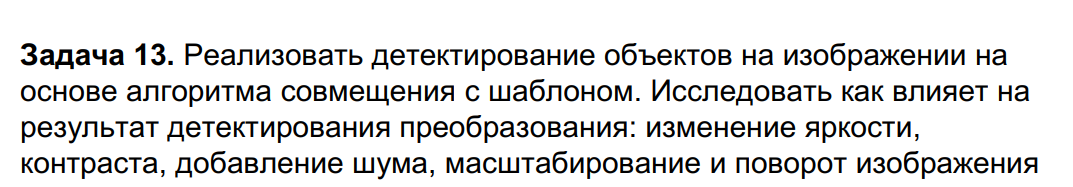

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets

In [4]:
img = cv.imread('students.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

img2 = img.copy()
template = cv.imread('student.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

@widgets.interact_manual(
    alpha=(1., 3.), beta=(0, 100), prob=(0.,1., 0.01),
    angle=(0, 360), scale=(0.01, 2., 0.01))
def InteractiveMatchTemplate(alpha=1., beta=0, prob=0., angle=0, scale=1):
    center = (img.shape[1]//2, img.shape[0]//2)
    rot_mat = cv.getRotationMatrix2D(center, angle, scale)
    rot_img = cv.warpAffine(img.copy(), rot_mat, (img.shape[1], img.shape[0]))
    new_image = cv.convertScaleAbs(rot_img, alpha=alpha, beta=beta)    
    output = new_image.copy()
    if len(new_image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = new_image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([220, 220, 220], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 240], dtype='uint8')
            white = np.array([200, 200, 200, 200], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    
    for meth in methods:
        img_copy = output.copy()
        method = eval(meth)                
        res = cv.matchTemplate(img_copy,template,method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)        
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)      
        cv.rectangle(img_copy,top_left, bottom_right, 0, 4)
        plt.figure(figsize=(8,8))
        plt.subplot(121),plt.imshow(res,cmap='gray')
        plt.title('Matching Result for '+meth), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img_copy,cmap='gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])        
        plt.show()

interactive(children=(FloatSlider(value=1.0, description='alpha', max=3.0, min=1.0), IntSlider(value=0, descri…

In [11]:
800 1200